In [1]:
import torch
import torch.nn as nn

In [2]:
# 20 amino acids
aa_vocab = {aa: idx + 1 for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}
aa_vocab

{'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [3]:
# Embedding layer
vocab_size = len(aa_vocab) + 1
embed_dim = 4
embedding = nn.Embedding(vocab_size, embed_dim)
embedding

Embedding(21, 4)

In [4]:
embedding.weight

Parameter containing:
tensor([[-0.7179, -0.5742, -0.8224,  0.8964],
        [ 0.3927,  0.6357, -0.2765,  0.1044],
        [-0.7926,  1.1134,  1.1092,  1.0299],
        [ 0.6806,  0.9284,  1.3393,  0.7971],
        [-0.2714,  0.0864,  0.0762, -0.7963],
        [ 0.6474,  1.1945,  3.1246,  0.4971],
        [-0.2595,  1.2252, -1.4151, -1.3117],
        [ 0.9516, -0.8269, -2.0587,  1.3142],
        [ 0.5659, -1.8497,  0.7947,  0.0511],
        [ 1.1637, -0.3427,  0.5188,  1.0576],
        [-0.0570, -0.2512, -0.6064,  1.9012],
        [ 0.3495, -1.2607, -1.8316,  0.7134],
        [ 0.4915, -0.0981, -0.2195,  1.0979],
        [ 0.5717,  0.3328,  1.9540,  0.5295],
        [ 1.1179,  0.0606, -1.5109, -0.5120],
        [-0.0449, -0.5351, -0.4701,  1.7329],
        [-1.7836,  1.6282, -0.8490,  0.1240],
        [ 0.1812,  0.1511, -0.0124,  0.4956],
        [-2.1150, -2.0327, -1.4164,  1.2968],
        [ 0.9286, -0.4315, -0.1144, -0.0917],
        [ 1.5701, -2.7100,  0.4474,  0.4666]], requires_gr

In [5]:
# prepare input
ls_antigen = [
    "MRSLLILVLCFLPLAALGKVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL"
]
X = [[aa_vocab.get(aa, 0) for aa in seq] for seq in ls_antigen]
X

[[11,
  15,
  16,
  10,
  10,
  8,
  10,
  18,
  10,
  2,
  5,
  10,
  13,
  10,
  1,
  1,
  10,
  6,
  9,
  18,
  5,
  6,
  15,
  2,
  4,
  10,
  1,
  1,
  1,
  11,
  9,
  15,
  7,
  6,
  10,
  3,
  12,
  20,
  15,
  6,
  20,
  16,
  10,
  6,
  12,
  19,
  18,
  2,
  1,
  1,
  9,
  5,
  4,
  16,
  12,
  5,
  12,
  17,
  14,
  1,
  17,
  12,
  15,
  12,
  17,
  3,
  6,
  16,
  17,
  3,
  20,
  6,
  8,
  10,
  14,
  8,
  12,
  16,
  15,
  19,
  19,
  2,
  12,
  3,
  6,
  15,
  17,
  13,
  6,
  16,
  15,
  12,
  10,
  2,
  12,
  8,
  13,
  2,
  16,
  1,
  10,
  10,
  16,
  16,
  3,
  8,
  17,
  1,
  16,
  18,
  12,
  2,
  1,
  9,
  9,
  8,
  18,
  16,
  3,
  6,
  12,
  6,
  11,
  12,
  1,
  19,
  18,
  1,
  19,
  15,
  12,
  15,
  2,
  9,
  6,
  17,
  3,
  18,
  14,
  1,
  19,
  8,
  15,
  6,
  2,
  15,
  10]]

In [6]:
first_seq = X[0]
print("Length of first sequence:", len(first_seq))

Length of first sequence: 147


In [7]:
data = torch.tensor(X)
data_embedding = embedding(data)
data_embedding

tensor([[[ 0.3495, -1.2607, -1.8316,  0.7134],
         [-0.0449, -0.5351, -0.4701,  1.7329],
         [-1.7836,  1.6282, -0.8490,  0.1240],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [ 0.5659, -1.8497,  0.7947,  0.0511],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [-2.1150, -2.0327, -1.4164,  1.2968],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [-0.7926,  1.1134,  1.1092,  1.0299],
         [ 0.6474,  1.1945,  3.1246,  0.4971],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [ 0.5717,  0.3328,  1.9540,  0.5295],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [ 0.3927,  0.6357, -0.2765,  0.1044],
         [ 0.3927,  0.6357, -0.2765,  0.1044],
         [-0.0570, -0.2512, -0.6064,  1.9012],
         [-0.2595,  1.2252, -1.4151, -1.3117],
         [ 1.1637, -0.3427,  0.5188,  1.0576],
         [-2.1150, -2.0327, -1.4164,  1.2968],
         [ 0.6474,  1.1945,  3.1246,  0.4971],
         [-0.

In [8]:
# convert index 11 into embedding vector
embedding.weight[11]

tensor([ 0.3495, -1.2607, -1.8316,  0.7134], grad_fn=<SelectBackward0>)

In [9]:
embedding_dim = embed_dim
hidden_size = 3
activation = "relu"

model = nn.RNN(
    input_size=embedding_dim,
    hidden_size=hidden_size,
    nonlinearity=activation,
    num_layers=1,
    batch_first=True,
)
model

RNN(4, 3, batch_first=True)

In [10]:
model.all_weights

[[Parameter containing:
  tensor([[-0.0461,  0.3013, -0.1927,  0.0121],
          [ 0.3821, -0.0498, -0.2428, -0.0565],
          [ 0.2161,  0.1105, -0.1312,  0.3944]], requires_grad=True),
  Parameter containing:
  tensor([[ 0.3154,  0.1721, -0.0816],
          [ 0.2546, -0.1153,  0.2702],
          [-0.2182, -0.0277,  0.5032]], requires_grad=True),
  Parameter containing:
  tensor([-0.5216, -0.1074,  0.4779], requires_grad=True),
  Parameter containing:
  tensor([-0.5041, -0.2024,  0.5316], requires_grad=True)]]

In [11]:
rnn_output, rnn_hidden = model(data_embedding)

# N, L, H_out. Where:
# N: number of sample
# L: number of layer stacking
# H_out: number of hidden node output
print(rnn_output.shape)

# num_layers, N, H_out
print(rnn_hidden.shape)

torch.Size([1, 147, 3])
torch.Size([1, 1, 3])


In [12]:
# last hidden state
rnn_hidden

tensor([[[0.0000, 0.4459, 3.2108]]], grad_fn=<StackBackward0>)

In [13]:
# get last hidden state
rnn_output[:, -1, :]

tensor([[0.0000, 0.4459, 3.2108]], grad_fn=<SliceBackward0>)

In [26]:
import torch.nn.functional as F

# apply sigmoid
num_classes = 1
fc = nn.Linear(hidden_size, num_classes)
output = F.sigmoid(fc(rnn_output))
output

tensor([[[0.5391],
         [0.5819],
         [0.5665],
         [0.6148],
         [0.6380],
         [0.6037],
         [0.6214],
         [0.5867],
         [0.6271],
         [0.5970],
         [0.5811],
         [0.6245],
         [0.5965],
         [0.6299],
         [0.6223],
         [0.6097],
         [0.6277],
         [0.5999],
         [0.6123],
         [0.5771],
         [0.5710],
         [0.5716],
         [0.5958],
         [0.5855],
         [0.5630],
         [0.6039],
         [0.6105],
         [0.6038],
         [0.6015],
         [0.6264],
         [0.6256],
         [0.6313],
         [0.6771],
         [0.6078],
         [0.6211],
         [0.6158],
         [0.6320],
         [0.6287],
         [0.6208],
         [0.5965],
         [0.6014],
         [0.5621],
         [0.6119],
         [0.5912],
         [0.6047],
         [0.6086],
         [0.5700],
         [0.5756],
         [0.5974],
         [0.5973],
         [0.6186],
         [0.5812],
         [0.

In [27]:
output.shape

torch.Size([1, 147, 1])

In [31]:
# get the probability
output.squeeze()

tensor([0.5391, 0.5819, 0.5665, 0.6148, 0.6380, 0.6037, 0.6214, 0.5867, 0.6271,
        0.5970, 0.5811, 0.6245, 0.5965, 0.6299, 0.6223, 0.6097, 0.6277, 0.5999,
        0.6123, 0.5771, 0.5710, 0.5716, 0.5958, 0.5855, 0.5630, 0.6039, 0.6105,
        0.6038, 0.6015, 0.6264, 0.6256, 0.6313, 0.6771, 0.6078, 0.6211, 0.6158,
        0.6320, 0.6287, 0.6208, 0.5965, 0.6014, 0.5621, 0.6119, 0.5912, 0.6047,
        0.6086, 0.5700, 0.5756, 0.5974, 0.5973, 0.6186, 0.5812, 0.5600, 0.5516,
        0.5983, 0.5743, 0.6134, 0.6044, 0.6276, 0.5986, 0.5964, 0.6179, 0.6285,
        0.6377, 0.6167, 0.6073, 0.5895, 0.5587, 0.5820, 0.5898, 0.6146, 0.5729,
        0.5572, 0.6006, 0.6316, 0.5767, 0.6043, 0.5716, 0.6122, 0.6153, 0.6030,
        0.5789, 0.6164, 0.6061, 0.5890, 0.6042, 0.6064, 0.5820, 0.5776, 0.5541,
        0.6006, 0.6239, 0.6368, 0.6013, 0.6313, 0.5938, 0.5720, 0.5767, 0.5654,
        0.5905, 0.6176, 0.6402, 0.5888, 0.5715, 0.5909, 0.5802, 0.5825, 0.5948,
        0.5655, 0.5630, 0.6059, 0.5852, 

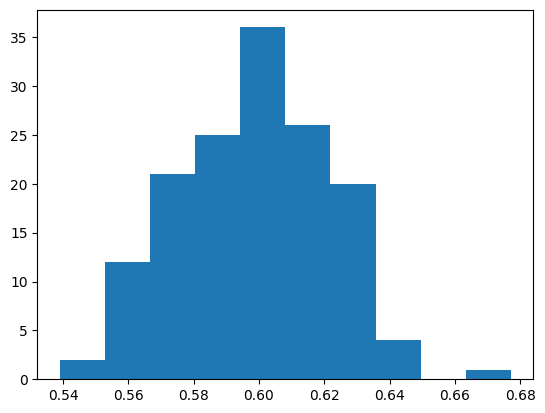

In [32]:
# plot histogram
import matplotlib.pyplot as plt

plt.hist(output.detach().numpy().flatten())
plt.show()